# Quantum LP solver with Zero-Sum Games

In [6]:
import numpy as np
import scipy as sp
from scipy import stats
import scipy.linalg
import pdb
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['text.usetex'] = True

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsfonts}')

import numpy as np
import zerosums as zs
from tqdm import tqdm
import importlib
importlib.reload(zs)
import pprint

In [25]:
def is_fullrank(A):
    sol = scipy.linalg.lstsq(A, np.zeros(A.shape[0]))
    return sol[2]  == min(A.shape)

Note that in the formula $e^{Ax - v_{max}}$ where $v_{max} = \max_{j} (Ax)_j$

we have that $v_{max} \leq 1$ and $\min_{j} (Ax)_j$ = -1$ so...

we have that $e^{(Ax)_j - v_{max}} \leq e^{-2}$

Therefore $p(0) = \frac{1}{N}\sum_{i=1}^N e^{-2} = \Omega(1)$

## Let's try to see if we can create a solvable problem

In [30]:
n = 6
k = 6     # maybe we need an odd number of discretizations?
epsilon = 10**-2
R = 1
strike_price = 20

In [ ]:
def build_D(omegas, mus, sigmas, pis, assets, strike_price):
    return np.random(

Let's try to generate random $\vec \mu$, $\vec \sigma$, $\vec \Pi$, and from these we generate some derivative $D$ (which we normalize to obtain $D\_$ ), and let's see if the default LP solver of scipy can return a valid $\ell_1=1$ norm solution to the problem. 

In [32]:
while True:
    mus = np.round(np.random.rand(n), 3)

    sigmas = np.random.rand(n)*2

    omegas = np.linspace(-6, 6, num=k)   

    pis = np.round(np.random.rand(n), 2)*3


    D = np.random.rand(len(omegas))
    #assets = zs.choice_of_assets(n)
    #D = zs.build_D(omegas, mus, sigmas, pis, assets, strike_price)
    # if we don't have enough assets in the basket of derivatives, let's try again
    if (np.max(D)==0) or  (  (k-np.count_nonzero(D))==k ):   
        print(",", end="")
        continue
    D_ = D/np.max(D)

    S = zs.build_S(pis, mus, sigmas, omegas)
    if is_fullrank(S.T) == False:
        print("F", end="")
    
    # let's add the constraint that we want a $ell_1$ norm = 1. 
    # the positivity is already taken in account in sp.optimize.linprog 
    MatA = np.vstack((S, np.ones(k)))
    VecB = np.hstack((pis, np.array([1]) ) )


    res = sp.optimize.linprog(D_, A_eq=MatA, b_eq=VecB)
    # in case we fail, let's try again. 
    print(".", end="")
    if res["status"] == 0:
        break

print("\n")
print(res["status"], "-", res["message"])   
print("Shape of S: {}".format(S.shape))
# is this a solution? 
print("Sq = \N{GREEK CAPITAL LETTER PI} is: ", np.allclose(S.dot(res["x"]), pis, atol=10**-7))
print("norm of q:", np.linalg.norm(res["x"], ord=1))

/var/folders/cd/x29qw_lj0yzf26xq_q6rzr3r0000gn/T/ipykernel_68286/4225064220.py:30: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = sp.optimize.linprog(D_, A_eq=MatA, b_eq=VecB)
/var/folders/cd/x29qw_lj0yzf26xq_q6rzr3r0000gn/T/ipykernel_68286/4225064220.py:30: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = sp.optimize.linprog(D_, A_eq=MatA, b_eq=VecB)
/var/folders/cd/x29qw_lj0yzf26xq_q6rzr3r0000gn/T/ipykernel_68286/4225064220.py:30: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = sp.optimi

.F...F.......................F..................................................................................................F..............F..........F...........................F..............................F..................................F.....F.F........................F.........................................................F.................................F...........F...............F........................F..............................................................F..F...............................F..........................................F.............................F...................................F......................F.............................................................F................F..........................F...............................................................................F..................................................F..........................................................................................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.01992e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


.......................F..F...F......................................................................................F.....................................F.............................................F...F...............F.................................................F......................................................................................................F......................................................F....................F...................F............F.........F.....................................................F..................................................................................................F.......................................................................F.................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.16103e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=7.30538e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...........................................F.F.................................F..............................F..........................................................................................F..........F......................................................................F.....F.............................................................................F.............................F.................................................................................F..............F..................F............................................................................................................................................F.............................F...................................F.............................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.06138e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.61277e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.24651e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=4.85943e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...................F.F...F.........................................................................F.....F...........F...........................................................F............................................F....................................................................................F.................F.................................................F............F.........................................................................F......F.................................F.................F.........................F................................................F.....................................F......F.....F.....................F....................................F..........................F.......................F...F......F....................................F..................................................F................F...................F................F.........................................F...............................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.77046e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.29305e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=7.09859e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


......................................................................................................F....................................................................F.....F...........................................F..........F.............................F......F....................................F...........................................F..........F.............................................F......F.................................F.....................F..............................F..................F........................................F...................................F.......................................................................................F.............................................................F...........................................F...........................................................................................................F....F......................F........F............................................F..................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=6.05203e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.80934e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=6.29912e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


....F............................F..............F.....................................F............F.............F...........................................................F....................F.......F.............................................................................................................................................................................................................F...............................................................................................................................F..................................F.................F.....F...........................F...........................F...............................F.....F...............................F.......................................F...................F...F...F..............F.............F.............................................................................................................................................................F.......................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.56033e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


................F.........................................F.............................................................................................F............................................................................................................................................................F.........F....F........F.....................F................................F........................................................................F.................F..................F.........................................F.....F........................................F...................................F............................................................F..........................................F..............................................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.06617e-17): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.60829e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.97664e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


............................................................F..F.................................................................F.............F.....................................F....................................................................F..............F..................................................................................................................F...................................................................................F.............................................F........F.F.........F......F.................................F.F..........F...................................................................F.......F...F...F..............................F.................................F.....................F.....................................F.....F..............F...F..........F....................................................F......F...............................................F....................................F........................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.18763e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


..................................F...........F.....................................................................F..................F..................................................F..F...............................F.....................................................F..............F.....F......F..................................................................................................................................F.....................F................................F.............F..................................F.F............F.....F................F......................................................................................F...........F..................................................F..............................................................F.........F......................................................F...............................................................................F...........................F..........F............F.............

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=9.84714e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=9.73913e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...............................................................................................F............................................................................................................................................................................................................................F..................................................................F.F.............................................................................................F............F.F....................F...........F.............F................................F............................................F..........................................................F.......................................................................F......................F....F................F...F.............F...............................................................................................................F....F.......................F.........F...........................F.......

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.07904e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...................................F..............F.......F......................F..................................................F............................F..............................F.............................................F................F................F...................F............................F..........................................F........................F..............................F.F..................F............................F............F....F....F...................................................................................................F.............................................F...........................F....................F.............................................................................F........................................F............................................................................................................F.............................................F.....................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.66554e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.11569e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


........F..........................................F.........F...............................F...................F...............................................F...........F.F.F......................F.........................................................F.........................................................................................................................F........F................F............F............F......F.........F..............................................F..........................................................F.....F...........................F..............F..F..................F.........F.F............................................................................................F..................................................F.......................................F..............................................................................F............................................F...........................................F.F.......

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=9.79489e-23): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.9581e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=5.9112e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


......F.....F.............F.......F......................F........F............................................F.....F..............................F................F........................F.......................................F...F........................................................F...........F..........................................................F.......................................F.....F................................................................................F.................................F...........F.................F........F.....F.....F......................F...................................................F.......................................F..................................................................................................F.............................F......................F......................................................................................................................................F.......................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=4.11348e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...........................F...............................................F.........................................................F...........................F..............................F.....F........F.........F.......F.........................................................................................F...............F....................F..........................F...........F.....F....F..F.....................F........................F.................................................F............F..........................................................................................F.F.................................F.............................................F........................................F.........................F

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=8.36116e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


..........F......................................................F........................................................F...........................................F...........F........................F......................F.......F............................................................F......................................................................................................................F...........................F.........................F.....................F...F.................F.F....................F...........................F....................................................................................................F.................................................................F..............F.....................F................................F.....................................F.F...........................................F.............................................................................F..................F.............F....

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=4.57505e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=4.92712e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.18136e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.88075e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


.........................F................................................................................................F........F...F....................F...................................................................................................F...F.....................................................................F...F..............................................................F.............................................F...........F...........F.......................................................F...................................F........................F.......................................................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.48549e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=8.09798e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...F.....................................................................................F.........................................F.................................F............................F................................................F.........................F.F...........F.....F................F..............F...............F................................F..F.................F.......................F.F.....F.............................................F........................F.............F...F...F.........................F................F........................F................F................................................F...........................................F............................F....F..............................................................................................................................................F...........................F...........F........................................................................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.84666e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...........F...............................F.........................................................................F....F..F..F....................F.........................................................F.......F..F......F....................F.........F...................F.................................F........F....................................F..................................................................................................................................................F..........F..................................................F.....F.............................................................................................................F..........F......

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=5.21588e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.3252e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.69838e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


.....................................F.............F.F..............................F..............................F....................................................F............................................................F................................................F.................................................F.................F...............F......F..............................................................................................F.........F...........F...........................................F....................................F..........................F.............................F.....................................................F...........................F.....................F...........F.........F..F..........................................................................................................F.........F.................................F...F..................................F..............F.........................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.16858e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.82116e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.58454e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=9.51491e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: 

...........................................F.....................................................................F.......................F.......................F......................................F......F.....F.....F......................F...................................................................................F..........................................................F................................F.......................................F...........................................F..........................F...............................F...............................F.....................F......................................F.............................................................................F..F....F..................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=5.41836e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=7.75557e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


....................F.....................F..F..............F.........F..............F.....................F...........F........................F...............F...................................F..................F...........................F...........F.......................F.......................................................................................F..............................F...............F..........................................................F..F.........................F............................F..........................F....F..........................................................................F................F..................................................................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=9.21294e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.81889e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...........................F................................F....F..............F..............................F............F.................F......................................................................F.......F.................................................................F......................F...F......................................................................F......................................................................................................................................F....................F.........................F......................F.......................F..F..........F..............................F......................................................................................................................F.........................F.......................................F.............F..............................................................................................................F..............................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.18439e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...................................F..........................F...............................F...............F.....F..................................F..........F.........................F.................................................................................F..................F..................................................................................................................................................................................F.......................................F............................................F..............................................................................................................F...........................................F..................................F...................................F................................F...F.........F......................F..........F..........F.F................................F.......................................................F.....................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=4.03508e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.87585e-22): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.25948e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


.................................................................F...........................................................................................................................................F...F...........F.............................................................F.........................................................................................F...........................................F........................F....................F...................................................................................................................................................................F.............................F..F..F.....................F............................................................F..........................................................................F........................................................................................................................................................F....F....................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=6.5825e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.65526e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=5.08455e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


...F...........................F....................................................................F.....F.........F......F.....F...F.......F.......F........................................................................................................................F..................................F................................F...........F.........F.........................F....................................F......................................................................................................................................................F.............................F.......................F.................................F......................................F.................F...........F......F.F............................................F....F...................F....F.......................................................F........................................F.......................................................................................

/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=5.20839e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/Users/scinawa/miniforge3/lib/python3.9/site-packages/scipy/optimize/_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.77134e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


....................F...................F.................F...................................F...............F..............F..............................F..........F......................................................................................F......................F........F....F......

KeyboardInterrupt: 

In [27]:
sol = scipy.linalg.lstsq(S.T, np.zeros(S.shape[1]))

sol[2]


6

In [ ]:
while True:
    mus = np.round(np.random.rand(n), 3)

    sigmas = np.random.rand(n)

    omegas = np.linspace(-6, 6, num=k)   

    pis = np.round(np.random.rand(n), 2)


    assets = zs.choice_of_assets(n)
    D = zs.build_D(omegas, mus, sigmas, pis, assets, strike_price)
    # if we don't have enough assets in the basket of derivatives, let's try again
    if (np.max(D)==0) or  (  (k-np.count_nonzero(D))==k ):   
        print(",", end="")
        continue
    D_ = D/np.max(D)

    S = zs.build_S(pis, mus, sigmas, omegas)
    

    # let's add the constraint that we want a $ell_1$ norm = 1. 
    # the positivity is already taken in account in sp.optimize.linprog 
    MatA = np.vstack((S, np.ones(k)))
    VecB = np.hstack((pis, np.array([1]) ) )


    res = sp.optimize.linprog(D_, A_eq=MatA, b_eq=VecB)
    # in case we fail, let's try again. 
    print(".", end="")
    if res["status"] == 0:
        break

print("\n")
print(res["status"], "-", res["message"])   
print("Shape of S: {}".format(S.shape))
# is this a solution? 
print("Sq = \N{GREEK CAPITAL LETTER PI} is: ", np.allclose(S.dot(res["x"]), pis, atol=10**-7))
print("norm of q:", np.linalg.norm(res["x"], ord=1))

## Generate data for plots

Here we just play a Zero-Sum game, with a random matrix generated from a BSM model.
Skip the next cell if you want to keep the values of n,k,mus,sigma, pis, that gives a solvable BSM model. 

This is the same code as the solve_zsg() function, is just pasted here so it's more explicit. On top of that, we use two arrays for storing the probabilities of sampling at each time step. 

In [5]:
####
# SKIP THE EXECUTION OF THIS CELL IF YOU WANT TO KEEP THE PARAMETERS 
# TO THE BSM MODEL THAT WE FOUND IN PREVIOUS ITERATIONS
####

n = 80
k = 400     # maybe we need an odd number of discretizations?
epsilon = 10**-2
R = 1
strike_price = 20

mus = np.round(np.random.rand(n), 3)

sigmas = np.round(np.random.rand(n), 3)

omegas = np.linspace(-6, 6, num=k)   

pis = np.round(np.random.rand(n), 2)

assets = zs.choice_of_assets(n)

D = zs.build_D(omegas, mus, sigmas, pis, assets, strike_price)
if (np.max(D)==0) or  (  (k-np.count_nonzero(D))==k ):
    print("issue", end="")
D_ = D/np.max(D)


In [11]:
# generate matrices and derivative vector
F, D_, A, c = zs.build_F(n, k, mus, sigmas, omegas, pis, D, alpha=1, R=1)

probabilities = []
probabilities_minus = []


epsilon = 10**-3
eta = epsilon/4

x, y = np.zeros(F.shape[0]), np.zeros(F.shape[1])

#for game_round in tqdm(range(0, int(4*np.log(F.shape[0]*F.shape[1])/epsilon**2))):
for game_round in tqdm(range(0, 800000)):

    P = np.exp(- F.T.dot(x))
    Q = np.exp(F.dot(y))

    p = P / np.linalg.norm(P, 1)
    q = Q / np.linalg.norm(Q, 1)

    probabilities.append (zs.calc_probabilities(F, x,y))      # the correct one
    probabilities_minus.append (zs.calc_probabilities(F, x,y, sign=False))  # the one without the - sign


    if (np.any(np.isnan(q))):
        print("q (y) is NAN at iteration {}".format(game_round))
        break
    if (np.any(np.isnan(p))):
        print("p (x) is NAN at iteration {}".format(game_round))
        break


    try:
        dist1 = stats.rv_discrete(name="x", values=(np.arange(len(x)), q))
        dist2 = stats.rv_discrete(name="y", values=(np.arange(len(y)), p))
        a, b = dist1.rvs(size=1)[0], dist2.rvs(size=1)[0]
    except Exception as e:
        pdb.set_trace()

    x[a] = x[a] + eta
    y[b] = y[b] + eta


 39%|███▉      | 312970/800000 [04:22<06:48, 1192.76it/s]


KeyboardInterrupt: 

## Plot probability of SUCCESS for sampling

- In the first plot we just take the "wrong" definition of $p(0)$ for the vector x (i.e. without the minus sign)
- In the second plot we take the right definition of $p(0)$ with the right sign at the exponent. 

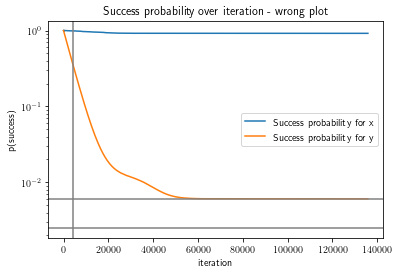

In [17]:
##### DISCARD THIS PLOT, IS DONE WITH THE WRONG DEFINITION OF P(0) FROM THE PAPER
prob = np.array(probabilities)

plt.plot(range(len(prob[:,0])), prob[:,0], label='Success probability for x')
plt.plot(range(len(prob[:,1])), prob[:,1], label='Success probability for y')
plt.axvline(x=1/eta, color="grey")
plt.axhline(y=1/F.shape[0], color="grey")
plt.axhline(y=1/F.shape[1], color="grey")


plt.title('Success probability over iteration - wrong plot')
plt.xlabel('iteration')
plt.ylabel('p(success)')

#plt.xscale('log')
plt.yscale('log')
# Add a legend
plt.legend()

# Show the plot
plt.show()


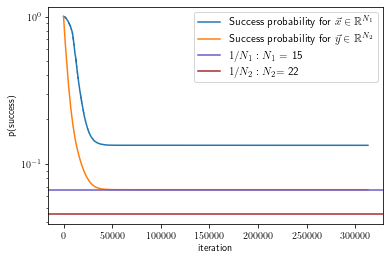

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [14]:
prob = np.array(probabilities_minus)
plt.plot(range(len(prob[:,0])), prob[:,0], label=r'Success probability for $\vec x \in \mathbb{R}^{N_1}$')
plt.plot(range(len(prob[:,1])), prob[:,1], label=r'Success probability for $\vec y \in \mathbb{R}^{N_2} $')

# before this line, the probability of success is constant
# plt.axvline(x=1/eta, color="grey", label=r'$1/\eta$')

plt.axhline(y=1/F.shape[0], color="slateblue", label=r"$1/N_1: N_1$ = {}".format(F.shape[0]) )
plt.axhline(y=1/F.shape[1], color="brown", label=r"$1/N_2: N_2$= {}".format(F.shape[1]))

#plt.title('Success probability per iteration for $(n={},k={}) \Rightarrow (N_1={}, N_2={})$'.format(n,k, 2*n+5, k+2))
plt.xlabel('iteration')
plt.ylabel('p(success)')

#plt.xscale('log')
plt.yscale('log')
# Add a legend
plt.legend( prop={'size': 11})

# Show the plot
fig1 = plt.gcf()
plt.show()
fig1.savefig('highquality.eps', format='eps')
fig1.savefig('highquality.svg', format='svg', dpi=1200)


Let's see the tail of the two values, to compare it with 1/n and 1/k

In [75]:
print(prob[-1:,0])
print(prob[-1:,1])
print(1/F.shape[0])
print(1/F.shape[1])

[0.14102605]
[0.07692308]
0.07692307692307693
0.045454545454545456


# TESTING

## First: Zero-Sum Games solver comparison

Let's compare the solution of a regular zero sum game solver (like the one in scipy) with the solution that we obtain from our python algorithms. 

- First, we do a very simple test, comparing the result of our implementation of ZSG with the known solution of rock-paper-scissor game. 
- Second, we compare our result with a python-library.

In [ ]:
A = np.array([ [0, -1, 1], [1,0,-1], [-1, 1, 0]  ])

value, x, y = zs.solve_zsg(A, 10**-3, round_numbers=30000)
print(np.dot(x.T, np.dot(A, y)), x, y)

print(np.allclose(value, 0, atol=10**-2), np.allclose(x, [1/3, 1/3, 1/3], atol=10**-2), np.allclose(y, [1/3, 1/3, 1/3], atol=10**-2) )

In [ ]:
#TODO
import nashpy as nash
# let's use this library..
# A = np.random.rand(10,10)
# rps = nash.Game(A)

-3.9719999999997214e-05 [0.3311 0.3278 0.3411] [0.3343 0.3298 0.3359]


## Second: LP solver comparison

Let's now test our code to see if we can solve a LP, for example, by comparing with a known LP solver (like scipy?)

In [17]:
diocn = 100000
q = np.full(diocn, 1/diocn)
np.linalg.norm(q, ord=2)

0.014142135623730918